In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk

In [64]:
df=pd.read_csv("spam (1).csv",encoding='latin8')

In [65]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [66]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [67]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [68]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [69]:
df.rename(columns={'v1':'Label','v2':'message'},inplace=True)

In [70]:
df

,Label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [71]:
df.shape

(5572, 2)

In [72]:
df.isnull().sum()

Label      0
message    0
dtype: int64

### There is no NULL Values In the Dataset

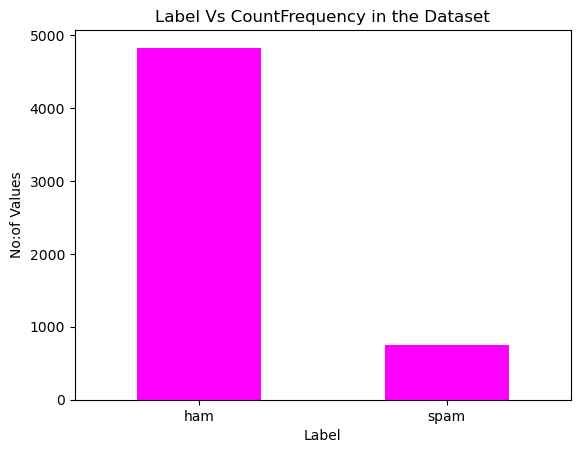

In [73]:
df.Label.value_counts().plot(kind='bar',color='magenta')
plt.title("Label Vs CountFrequency in the Dataset")
plt.ylabel("No:of Values")
plt.xticks(rotation=0);

### The Dataset is Imbalanced Towards The ham Label

In [74]:
corpus=[]
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [75]:
lemmatizer=WordNetLemmatizer()

In [76]:
for i in range(len(df)):
    review=re.sub('[^a-zA-Z]',' ',df['message'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review=" ".join(review)
    corpus.append(review)
                  

In [77]:
df.columns

Index(['Label', 'message'], dtype='object')

In [78]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [79]:
!pip install gensim

In [80]:
import gensim

In [81]:
from gensim.utils import simple_preprocess

In [82]:
words=[]
for sent in corpus:
    words.append(simple_preprocess(sent))

In [83]:
words

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply'],
 ['dun', 'say', 'early', 'hor', 'already', 'say'],
 ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'caller',
  'press',
  'copy',
  'friend',
  'callertune'],
 ['winner',
  'valued',
  'network',
  'customer',
  'selected',
  'receivea',
 

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
len(words)

5572

In [86]:
model=gensim.models.Word2Vec(words)

In [87]:
model

In [88]:
### To get all the Vocabulary
model.wv.index_to_key

['call',
 'get',
 'ur',
 'gt',
 'lt',
 'go',
 'ok',
 'day',
 'free',
 'know',
 'come',
 'like',
 'time',
 'good',
 'got',
 'text',
 'love',
 'want',
 'send',
 'txt',
 'need',
 'one',
 'today',
 'going',
 'home',
 'stop',
 'lor',
 'sorry',
 'see',
 'still',
 'mobile',
 'take',
 'back',
 'da',
 'reply',
 'think',
 'tell',
 'dont',
 'week',
 'phone',
 'hi',
 'new',
 'later',
 'pls',
 'please',
 'co',
 'msg',
 'min',
 'make',
 'dear',
 'night',
 'message',
 'say',
 'well',
 'thing',
 'much',
 'great',
 'claim',
 'oh',
 'hope',
 'hey',
 'number',
 'friend',
 'happy',
 'wat',
 'work',
 'give',
 'way',
 'yes',
 'www',
 'prize',
 'let',
 'right',
 'tomorrow',
 'already',
 'tone',
 'ask',
 'win',
 'said',
 'cash',
 'yeah',
 'really',
 'amp',
 'life',
 'meet',
 'im',
 'babe',
 'find',
 'morning',
 'service',
 'thanks',
 'miss',
 'year',
 'last',
 'uk',
 'com',
 'would',
 'nokia',
 'anything',
 'lol',
 'also',
 'care',
 'every',
 'feel',
 'keep',
 'pick',
 'sure',
 'sent',
 'urgent',
 'contact',


In [89]:
model.corpus_count

5572

In [90]:
model.epochs

5

In [91]:
model.wv.similar_by_word('good')

[('day', 0.9995673298835754),
 ('last', 0.9995367527008057),
 ('much', 0.9995312094688416),
 ('one', 0.9995253682136536),
 ('want', 0.9995112419128418),
 ('going', 0.999501645565033),
 ('thanks', 0.999496340751648),
 ('get', 0.9994956851005554),
 ('go', 0.999493420124054),
 ('dear', 0.999488890171051)]

In [92]:
model.wv.similar_by_word('happy')

[('day', 0.9994087815284729),
 ('year', 0.9993261694908142),
 ('sleep', 0.999324381351471),
 ('many', 0.999316930770874),
 ('dear', 0.9993102550506592),
 ('hope', 0.9992965459823608),
 ('love', 0.9992899298667908),
 ('wish', 0.9992676973342896),
 ('hello', 0.99925297498703),
 ('good', 0.9992455244064331)]

In [93]:
model.wv['good'].shape

(100,)

In [94]:
def avgword2vec(doc):
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [95]:
!pip install tqdm

### In Python, tqdm is a popular library used to show progress bars for loops and long-running tasks.
It makes it easy to track how much of the task has been completed and how much is left

In [96]:
from tqdm import tqdm

In [97]:
x=[]
for i in tqdm(range(len(words))):
    x.append(avgword2vec(words[i]))
    

  0%|                                                                                         | 0/5572 [00:00<?, ?it/s]C:\Users\jagad\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jagad\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████████████████████████████████████| 5572/5572 [00:01<00:00, 2960.69it/s]


In [98]:
x

[array([-0.12382278,  0.25160724, -0.01006171,  0.06228603,  0.06610063,
        -0.4193897 ,  0.12273698,  0.40701455, -0.18495283, -0.13500382,
        -0.13798536, -0.34348318, -0.03217982,  0.1459416 ,  0.03155895,
        -0.15162592,  0.03847042, -0.26902586, -0.10102949, -0.5001242 ,
         0.10224207,  0.16224106,  0.03445301, -0.11603191, -0.15559298,
        -0.00610586, -0.18077774, -0.14032541, -0.1888605 ,  0.0774323 ,
         0.2762492 ,  0.05189596,  0.07372615, -0.13677727, -0.09717591,
         0.2397014 ,  0.02981248, -0.25400347, -0.20550758, -0.42414   ,
        -0.00973582, -0.15766416, -0.0713393 ,  0.06112232,  0.2432816 ,
        -0.13220473, -0.05548886, -0.09083693,  0.2129815 ,  0.2127585 ,
         0.08734869, -0.20164871, -0.01122968, -0.04885881, -0.20619212,
         0.15278934,  0.1065459 , -0.02540933, -0.27433082,  0.07876417,
         0.14613253,  0.10214483, -0.19280514, -0.0477924 , -0.3978998 ,
         0.2265223 ,  0.14152038,  0.11179019, -0.3

In [99]:
len(x)

5572

In [101]:
df

,Label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [119]:
y=pd.get_dummies(df["Label"])

In [120]:
y

,ham,spam
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
5567,False,True
5568,True,False
5569,True,False
5570,True,False


In [121]:
y=y["ham"]

In [122]:
y

0        True
1        True
2       False
3        True
4        True
        ...  
5567    False
5568     True
5569     True
5570     True
5571     True
Name: ham, Length: 5572, dtype: bool

In [123]:
df=pd.DataFrame()

In [127]:


for i in range(len(x)):
    df = pd.concat([df, pd.DataFrame(x[i].reshape(1, -1))], ignore_index=True)


C:\Users\jagad\AppData\Local\Temp\ipykernel_23400\3339861679.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(x[i].reshape(1, -1))], ignore_index=True)


In [128]:
df.shape

(5572, 100)

In [129]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.123823,0.251607,-0.010062,0.062286,0.066101,-0.419390,0.122737,0.407015,-0.184953,-0.135004,...,0.309191,0.098211,-0.058671,0.075041,0.440536,0.214684,0.128880,-0.308956,0.158854,-0.012545
1,-0.105422,0.211592,-0.011590,0.062110,0.054813,-0.362649,0.101218,0.345269,-0.160828,-0.112555,...,0.262500,0.086374,-0.054630,0.064062,0.381501,0.189258,0.121232,-0.265450,0.143110,-0.011132
2,-0.128406,0.267626,-0.016220,0.071854,0.069086,-0.424879,0.131134,0.411485,-0.189797,-0.128440,...,0.309864,0.100202,-0.058095,0.081153,0.455121,0.228482,0.126904,-0.310845,0.174537,-0.014518
3,-0.174454,0.344119,-0.016307,0.093508,0.084575,-0.582061,0.169240,0.566092,-0.264436,-0.177149,...,0.430407,0.136679,-0.082418,0.104724,0.622357,0.298413,0.189338,-0.429575,0.227677,-0.029055
4,-0.144093,0.289817,-0.008513,0.071349,0.072997,-0.483422,0.140443,0.468402,-0.213569,-0.151977,...,0.353324,0.117107,-0.067340,0.084599,0.502209,0.245068,0.151719,-0.351157,0.183694,-0.017558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,-0.150947,0.312366,-0.012208,0.078174,0.080166,-0.492413,0.151196,0.475090,-0.220851,-0.150366,...,0.357890,0.113148,-0.060218,0.093553,0.534332,0.269580,0.141805,-0.359215,0.205776,-0.017396
5568,-0.151131,0.292123,-0.002771,0.070279,0.065295,-0.502790,0.143423,0.485121,-0.224538,-0.161046,...,0.363835,0.110018,-0.069143,0.083638,0.519706,0.251383,0.161892,-0.371145,0.192149,-0.022024
5569,-0.056666,0.108824,-0.011541,0.026905,0.018984,-0.175947,0.045561,0.162907,-0.068953,-0.053394,...,0.126900,0.031127,-0.032442,0.020782,0.183624,0.090708,0.058981,-0.116105,0.067909,-0.009357
5570,-0.135748,0.279223,-0.016840,0.068535,0.071368,-0.452302,0.137914,0.437856,-0.203529,-0.139561,...,0.328335,0.104426,-0.062974,0.083015,0.480727,0.237049,0.139213,-0.331308,0.175720,-0.016579


In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,y,random_state=42,test_size=0.2)

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
classifier=RandomForestClassifier()

In [133]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [134]:
classifier.score(x_test,y_test)

0.9632286995515695

In [135]:
y_preds=classifier.predict(x_test)

In [136]:
y_preds

array([ True,  True,  True, ...,  True,  True,  True])

In [137]:
from sklearn.metrics import confusion_matrix,classification_report

In [139]:
cm=confusion_matrix(y_test,y_preds)

In [140]:
cm

array([[118,  32],
       [  9, 956]], dtype=int64)

<Axes: >

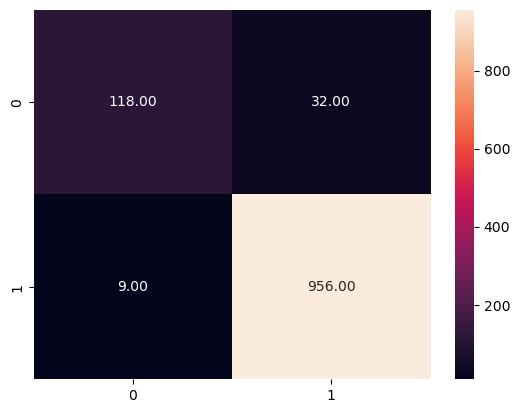

In [141]:
sns.heatmap(cm,annot=True,fmt='.2f')

In [143]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

       False       0.93      0.79      0.85       150
        True       0.97      0.99      0.98       965

    accuracy                           0.96      1115
   macro avg       0.95      0.89      0.92      1115
weighted avg       0.96      0.96      0.96      1115

